# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

np.random.seed(2)
sns.set(style='white', context='notebook', palette='deep')

# Data Preparation

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist.npz')
x_train = x_train/255
x_test = x_test/255
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


# Reduce Unit Size from 784 to 200

In [3]:
latent_dim = 200

class Autoencoder1(Model):
  def __init__(self, latent_dim):
    super(Autoencoder1, self).__init__()
    self.latent_dim1 = latent_dim   
    self.encoder1 = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder1 = tf.keras.Sequential([
      layers.Dense(784, activation='relu'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded1 = self.encoder1(x)
    decoded1 = self.decoder1(encoded1)
    return decoded1

autoencoder1 = Autoencoder1(latent_dim)

In [4]:
autoencoder1.compile(optimizer='RMSprop', loss=losses.MeanSquaredError(), metrics=['accuracy'])

autoencoder1.fit(x_train, x_train,
                epochs=100,
                batch_size=100,
                shuffle=True,
                validation_split=0.3)

Epoch 1/100
420/420 [==============================] - 11s 21ms/step - loss: 0.0301 - accuracy: 0.4149 - val_loss: 0.0127 - val_accuracy: 0.5506
Epoch 2/100
420/420 [==============================] - 4s 10ms/step - loss: 0.0116 - accuracy: 0.5515 - val_loss: 0.0104 - val_accuracy: 0.5712
Epoch 3/100
420/420 [==============================] - 4s 10ms/step - loss: 0.0099 - accuracy: 0.5726 - val_loss: 0.0090 - val_accuracy: 0.5898
Epoch 4/100
420/420 [==============================] - 4s 10ms/step - loss: 0.0090 - accuracy: 0.5835 - val_loss: 0.0093 - val_accuracy: 0.6007
Epoch 5/100
420/420 [==============================] - 4s 10ms/step - loss: 0.0085 - accuracy: 0.5898 - val_loss: 0.0082 - val_accuracy: 0.5934
Epoch 6/100
420/420 [==============================] - 4s 10ms/step - loss: 0.0083 - accuracy: 0.5922 - val_loss: 0.0067 - val_accuracy: 0.6012
Epoch 7/100
420/420 [==============================] - 4s 10ms/step - loss: 0.0075 - accuracy: 0.5935 - val_loss: 0.0077 - val_accuracy

420/420 [==============================] - 4s 10ms/step - loss: 0.0053 - accuracy: 0.6112 - val_loss: 0.0052 - val_accuracy: 0.6104
Epoch 58/100
420/420 [==============================] - 4s 10ms/step - loss: 0.0053 - accuracy: 0.6076 - val_loss: 0.0059 - val_accuracy: 0.6035
Epoch 59/100
420/420 [==============================] - 4s 10ms/step - loss: 0.0053 - accuracy: 0.6091 - val_loss: 0.0054 - val_accuracy: 0.6113
Epoch 60/100
420/420 [==============================] - 4s 10ms/step - loss: 0.0053 - accuracy: 0.6087 - val_loss: 0.0054 - val_accuracy: 0.6140
Epoch 61/100
420/420 [==============================] - 4s 11ms/step - loss: 0.0053 - accuracy: 0.6086 - val_loss: 0.0049 - val_accuracy: 0.6227
Epoch 62/100
420/420 [==============================] - 4s 10ms/step - loss: 0.0053 - accuracy: 0.6103 - val_loss: 0.0053 - val_accuracy: 0.6191
Epoch 63/100
420/420 [==============================] - 4s 10ms/step - loss: 0.0053 - accuracy: 0.6089 - val_loss: 0.0058 - val_accuracy: 0.612

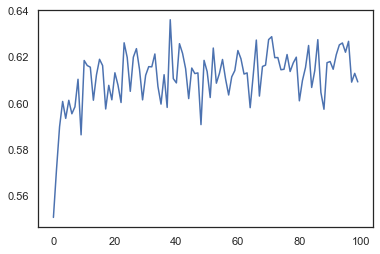

In [5]:
plt.plot(autoencoder1.history.history['val_accuracy'])

In [6]:
encoded_imgs = autoencoder1.encoder1(x_test).numpy()
decoded_imgs = autoencoder1.decoder1(encoded_imgs).numpy()

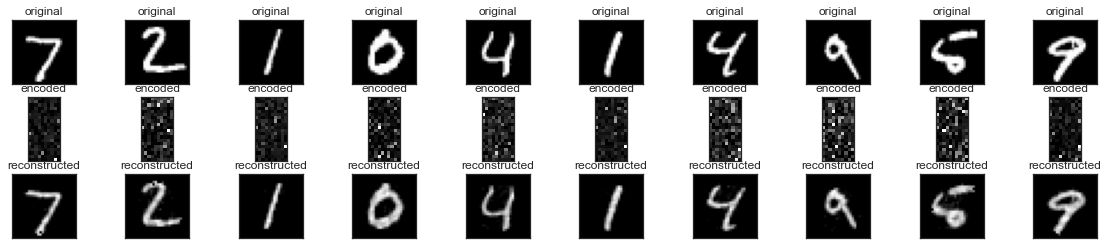

In [7]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display encoded images
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(20,10))
  plt.title("encoded")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n*2)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

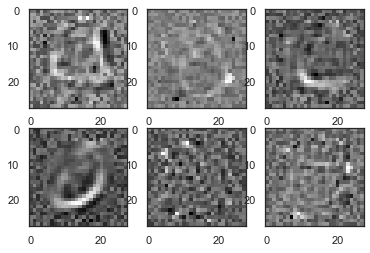

In [8]:
for layer in autoencoder1.layers:
    weights = layer.get_weights()
    
fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(weights[0][0].reshape(28, 28))
axs[0, 1].imshow(weights[0][7].reshape(28, 28))
axs[0, 2].imshow(weights[0][25].reshape(28, 28))
axs[1, 0].imshow(weights[0][93].reshape(28, 28))
axs[1, 1].imshow(weights[0][100].reshape(28, 28))
axs[1, 2].imshow(weights[0][120].reshape(28, 28))

plt.show()

# Reduce Unit Size from 200 to 45

In [9]:
latent_dim = 45

class Autoencoder2(Model):
  def __init__(self, latent_dim):
    super(Autoencoder2, self).__init__()
    self.latent_dim2 = latent_dim   
    self.encoder2 = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder2 = tf.keras.Sequential([
      layers.Dense(200, activation='relu'),
      layers.Reshape((20, 10))
    ])

  def call(self, x):
    encoded2 = self.encoder2(x)
    decoded2 = self.decoder2(encoded2)
    return decoded2

autoencoder2 = Autoencoder2(latent_dim)

In [10]:
x_train_200 = autoencoder1.encoder1.predict(x_train).reshape(60000, 20, 10)
x_test_200 = autoencoder1.encoder1.predict(x_test).reshape(10000, 20, 10)

In [11]:
autoencoder2.compile(optimizer='RMSprop', loss=losses.MeanSquaredError(), metrics=['accuracy'])

In [12]:
autoencoder2.fit(x_train_200, x_train_200,
                epochs=100,
                batch_size=100,
                shuffle=True,
                validation_split=0.3)

Epoch 1/100
420/420 [==============================] - 4s 6ms/step - loss: 0.1793 - accuracy: 0.4797 - val_loss: 0.0862 - val_accuracy: 0.6573
Epoch 2/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0818 - accuracy: 0.6734 - val_loss: 0.0718 - val_accuracy: 0.6988
Epoch 3/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0711 - accuracy: 0.7057 - val_loss: 0.0670 - val_accuracy: 0.7105
Epoch 4/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0670 - accuracy: 0.7168 - val_loss: 0.0648 - val_accuracy: 0.7205
Epoch 5/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0646 - accuracy: 0.7231 - val_loss: 0.0623 - val_accuracy: 0.7230
Epoch 6/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0626 - accuracy: 0.7273 - val_loss: 0.0613 - val_accuracy: 0.7292
Epoch 7/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0613 - accuracy: 0.7296 - val_loss: 0.0587 - val_accuracy: 0.7302

Epoch 58/100
420/420 [==============================] - 2s 4ms/step - loss: 0.0569 - accuracy: 0.7385 - val_loss: 0.0564 - val_accuracy: 0.7372
Epoch 59/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0570 - accuracy: 0.7396 - val_loss: 0.0565 - val_accuracy: 0.7371
Epoch 60/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0569 - accuracy: 0.7397 - val_loss: 0.0564 - val_accuracy: 0.7383
Epoch 61/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0569 - accuracy: 0.7394 - val_loss: 0.0567 - val_accuracy: 0.7376
Epoch 62/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0569 - accuracy: 0.7392 - val_loss: 0.0565 - val_accuracy: 0.7383
Epoch 63/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0569 - accuracy: 0.7395 - val_loss: 0.0563 - val_accuracy: 0.7389
Epoch 64/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0569 - accuracy: 0.7389 - val_loss: 0.0564 - val_accuracy:

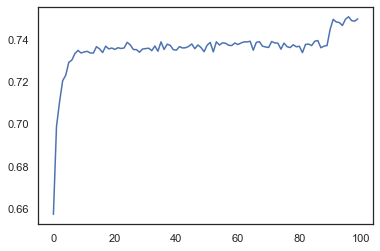

In [13]:
plt.plot(autoencoder2.history.history['val_accuracy'])

In [14]:
encoded_imgs = autoencoder2.encoder2(x_test_200).numpy()
decoded_imgs = autoencoder2.decoder2(encoded_imgs).numpy()

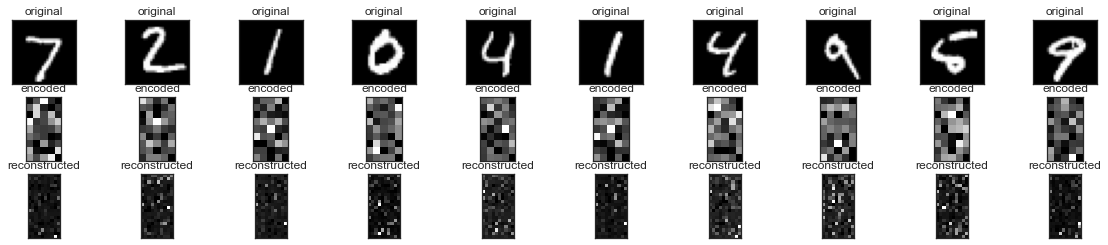

In [15]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display encoded images
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(9,5))
  plt.title("encoded")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n*2)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

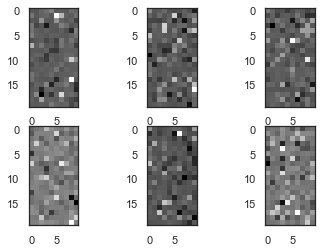

In [16]:
for layer in autoencoder2.layers:
    weights = layer.get_weights()
    
fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(weights[0][0].reshape(20, 10))
axs[0, 1].imshow(weights[0][7].reshape(20, 10))
axs[0, 2].imshow(weights[0][21].reshape(20, 10))
axs[1, 0].imshow(weights[0][30].reshape(20, 10))
axs[1, 1].imshow(weights[0][36].reshape(20, 10))
axs[1, 2].imshow(weights[0][42].reshape(20, 10))

plt.show()

# Reduce Unit Size from 45 to 10

In [17]:
ys_train = np.zeros((60000,10))
for i in range(0, 60000):
    for j in range(0, 10):
        curr_digit = y_train[i]
        if (j==curr_digit):
            ys_train[i, j] = 1

In [18]:
ys_test = np.zeros((10000,10))
for i in range(0, 10000):
    for j in range(0, 10):
        curr_digit = y_test[i]
        if (j==curr_digit):
            ys_test[i, j] = 1

In [19]:
latent_dim = 15

class Autoencoder3(Model):
  def __init__(self, latent_dim):
    super(Autoencoder3, self).__init__()
    self.latent_dim3 = latent_dim   
    self.encoder3 = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder3 = tf.keras.Sequential([
      layers.Dense(10, activation='softmax'),
    ])

  def call(self, x):
    encoded3 = self.encoder3(x)
    decoded3 = self.decoder3(encoded3)
    return decoded3

autoencoder3 = Autoencoder3(latent_dim)

In [20]:
x_train_45 = autoencoder2.encoder2.predict(x_train_200).reshape(60000, 9, 5)
x_test_45 = autoencoder2.encoder2.predict(x_test_200).reshape(10000, 9, 5)

In [21]:
autoencoder3.compile(optimizer='RMSprop', loss=losses.MeanSquaredError(), metrics=['accuracy'])

In [22]:
autoencoder3.fit(x_train_45, ys_train,
                epochs=100,
                batch_size=100,
                shuffle=True,
                validation_split=0.3)

Epoch 1/100
420/420 [==============================] - 4s 5ms/step - loss: 0.0775 - accuracy: 0.3481 - val_loss: 0.0350 - val_accuracy: 0.8029
Epoch 2/100
420/420 [==============================] - 2s 4ms/step - loss: 0.0312 - accuracy: 0.8219 - val_loss: 0.0220 - val_accuracy: 0.8637
Epoch 3/100
420/420 [==============================] - 2s 4ms/step - loss: 0.0213 - accuracy: 0.8695 - val_loss: 0.0188 - val_accuracy: 0.8791
Epoch 4/100
420/420 [==============================] - 1s 4ms/step - loss: 0.0188 - accuracy: 0.8798 - val_loss: 0.0173 - val_accuracy: 0.8879
Epoch 5/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0172 - accuracy: 0.8916 - val_loss: 0.0164 - val_accuracy: 0.8914
Epoch 6/100
420/420 [==============================] - 1s 3ms/step - loss: 0.0160 - accuracy: 0.8973 - val_loss: 0.0157 - val_accuracy: 0.8974
Epoch 7/100
420/420 [==============================] - 1s 3ms/step - loss: 0.0157 - accuracy: 0.8984 - val_loss: 0.0154 - val_accuracy: 0.8978

Epoch 58/100
420/420 [==============================] - 2s 4ms/step - loss: 0.0117 - accuracy: 0.9247 - val_loss: 0.0124 - val_accuracy: 0.9192
Epoch 59/100
420/420 [==============================] - 2s 4ms/step - loss: 0.0116 - accuracy: 0.9239 - val_loss: 0.0122 - val_accuracy: 0.9196
Epoch 60/100
420/420 [==============================] - 1s 3ms/step - loss: 0.0116 - accuracy: 0.9250 - val_loss: 0.0123 - val_accuracy: 0.9186
Epoch 61/100
420/420 [==============================] - 2s 4ms/step - loss: 0.0120 - accuracy: 0.9215 - val_loss: 0.0123 - val_accuracy: 0.9190
Epoch 62/100
420/420 [==============================] - 2s 4ms/step - loss: 0.0117 - accuracy: 0.9237 - val_loss: 0.0123 - val_accuracy: 0.9196
Epoch 63/100
420/420 [==============================] - 2s 4ms/step - loss: 0.0115 - accuracy: 0.9246 - val_loss: 0.0122 - val_accuracy: 0.9202
Epoch 64/100
420/420 [==============================] - 2s 4ms/step - loss: 0.0118 - accuracy: 0.9240 - val_loss: 0.0122 - val_accuracy:

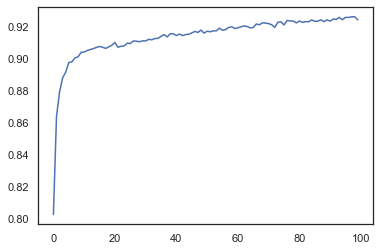

In [23]:
plt.plot(autoencoder3.history.history['val_accuracy'])

In [24]:
results = autoencoder3.evaluate(x_test_45, ys_test, batch_size=128)
print(results)

79/79 [==============================] - 1s 3ms/step - loss: 0.0109 - accuracy: 0.9291
[0.010920661501586437, 0.929099977016449]
